In [157]:
#import and difinitions
import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


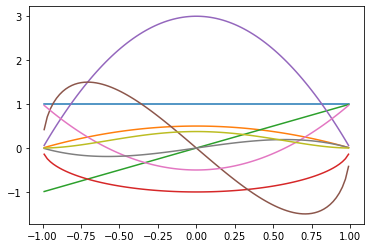

In [158]:
facttable=[math.factorial(x) for x in range(0,40)]
#for fast factorial calculation
def factorial(x):   
    return facttable[x]

#The Legendre polynomials    
def P(l,m, x):
    # evaluate an Associated Legendre Polynomial P(l,m,x) at x
    pmm = 1.0
    if m>0:
        somx2 = math.sqrt((1.0-x)*(1.0+x))
        fact = 1.0
        for i in range(1,m+1):
            pmm *= -fact * somx2
            fact += 2.0

    if l==m:
        return pmm
    pmmp1 = x * (2.0*m+1.0) * pmm
    if l==m+1:
        return pmmp1
    pll = 0.0
    for ll in range( m+2, l+1):
        pll = ( (2.0*ll-1.0)*x*pmmp1-(ll+m-1.0)*pmm ) / (ll-m)
        pmm = pmmp1
        pmmp1 = pll
    return pll

XAxis = [((x+0.5)/100.0-0.5)*2 for x in range(0,100)]
plt.plot(XAxis,[P(0,0,((x+0.5)/100.0-0.5)*2) for x in range(0,100)])
plt.plot(XAxis,[P(1,-1,((x+0.5)/100.0-0.5)*2) for x in range(0,100)])
plt.plot(XAxis,[P(1,0,((x+0.5)/100.0-0.5)*2) for x in range(0,100)])
plt.plot(XAxis,[P(1,1,((x+0.5)/100.0-0.5)*2) for x in range(0,100)])
plt.plot(XAxis,[P(2,2,((x+0.5)/100.0-0.5)*2) for x in range(0,100)])
plt.plot(XAxis,[P(2,1,((x+0.5)/100.0-0.5)*2) for x in range(0,100)])
plt.plot(XAxis,[P(2,0,((x+0.5)/100.0-0.5)*2) for x in range(0,100)])
plt.plot(XAxis,[P(2,-1,((x+0.5)/100.0-0.5)*2) for x in range(0,100)])
plt.plot(XAxis,[P(2,-2,((x+0.5)/100.0-0.5)*2) for x in range(0,100)])


In [159]:
# renormalisation constant for SH function
def K(l,m):
    temp = ((2.0*l+1.0)*factorial(l-m)) / (4.0*math.pi*factorial(l+m))
    return math.sqrt(temp)
#spherical harmonic funcion
def SH(l, m, theta, phi):
    sqrt2 = math.sqrt(2.0)
    if m==0:
        return K(l,0)*P(l,m,math.cos(theta))
    elif m>0:
        return sqrt2*K(l,m)*math.cos(m*phi)*P(l,m,math.cos(theta))
    else:
        return sqrt2*K(l,-m)*math.sin(-m*phi)*P(l,-m,math.cos(theta))



In [160]:
from collections import namedtuple
Sample = namedtuple('Sample',['x' , 'y','z','theta','phi','coeffs'])
def getSamples(N):
    s=[]
    n = float(N)
    for i in range(N):
        for j in range(N):
            theta = 2.0* math.acos(math.sqrt(1.0-(i+random.random() )/n))
            phi = (j+random.random() )/n*math.pi*2
            x = math.cos(phi)*math.sin(theta)
            y = math.sin(phi)*math.sin(theta)
            z = math.cos(theta)
            coeffs=[]
            for l in range(0,4):
                for m in range(-l,l+1):
                    coeffs.append(SH(l,m,theta,phi))
            s.append(Sample(x,y,z,theta,phi,coeffs))
    return s
    


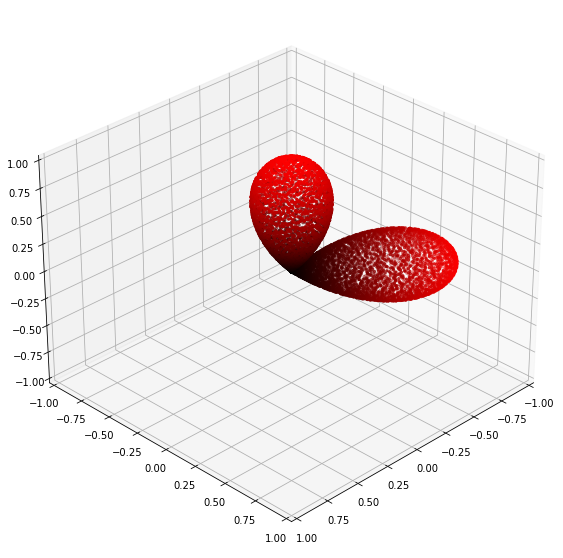

In [161]:
def myFunc(theta, phi):
    return max(0,5*math.cos(theta)-4) + max(0,-4*math.sin(theta-math.pi)*math.cos(phi-2.5)-3)
#visualize myFunc
def visMyFunc( func , fig, a=1,b=1,c=1):
    
    ax = fig.add_subplot(a,b,c, projection='3d')
    x=[]
    y=[]
    z=[]
    c=[]
    N = 200
    samples = getSamples(N)
    for s in samples:
            theta = s.theta
            phi = s.phi
            xx = math.cos(phi)*math.sin(theta)
            yy = math.sin(phi)*math.sin(theta)
            zz = math.cos(theta)
            v = func(theta, phi)
            
            x.append(xx*abs(v))
            y.append(yy*abs(v))
            z.append(zz*abs(v))
            if v > 0:
                c.append([v,0,0])
            else:
                c.append([0,-v,0])


    ax.scatter(x, y, z, s=5,c=c)
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
   
    ax.view_init(30, 45) 
fig = plt.figure(figsize=[10,10])
visMyFunc(myFunc,fig)


In [162]:
#projection
N = 200
result=[]

result = [0]*16
samples = getSamples(N)
weight = 4*math.pi
oneOverN = 1/(N*N)
factor = weight*oneOverN

for s in samples:
    f = myFunc(s.theta, s.phi)
    for i in range(16):
        result[i] += s.coeffs[i]*f*factor


print (["%.6f" % elem for elem in result])
#the result are almost the same as calculated in page 17, http://www.cse.chalmers.se/~uffe/xjobb/Readings/GlobalIllumination/Spherical%20Harmonic%20Lighting%20-%20the%20gritty%20details.pdf

['0.398724', '-0.210485', '0.286432', '0.281892', '-0.314963', '-0.000032', '0.131155', '0.000167', '0.093237', '-0.249619', '-0.000067', '0.123485', '0.303490', '-0.164984', '-0.000050', '-0.092168']


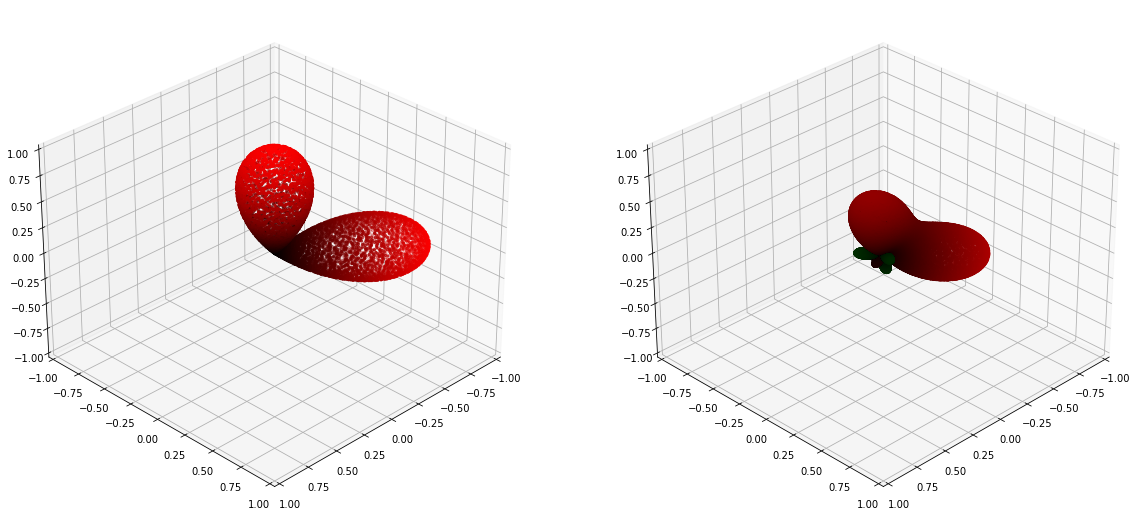

In [163]:

from functools import partial
#rebuild
def rebuild_myFunc(coeffs,theta, phi):
    result = 0
    i = 0
    for l in range(0,4):
        for m in range(-l,l+1):
            result += SH(l,m,theta,phi)*coeffs[i]
            i += 1
    return result

g = partial(rebuild_myFunc, result)
#show original function and compare with rebuilt from coeffs
fig = plt.figure(figsize=[20,20])

visMyFunc(myFunc,fig,1,2,1)

visMyFunc(g,fig,1,2,2)

